In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\admin\Downloads\HR.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [3]:
df.shape

(1470, 35)

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
df['Attrition']=df['Attrition'].astype(str).str.strip()

Attrition
No     1233
Yes     237
Name: count, dtype: int64


Text(0.5, 1.0, 'Attrition Distribution')

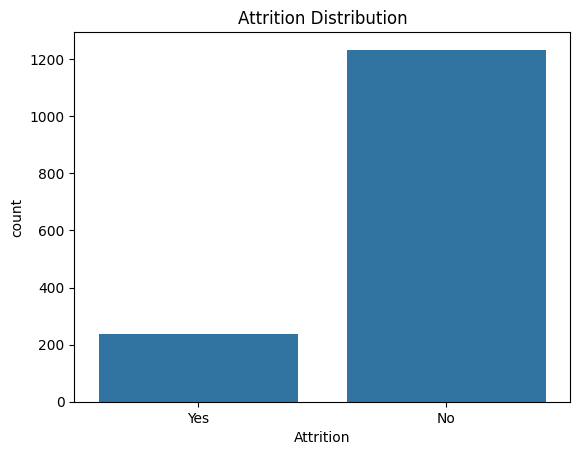

In [8]:
df_clean=df[df['Attrition'].isin(['Yes','No'])].copy()
print(df_clean['Attrition'].value_counts())
sns.countplot(x='Attrition',data=df_clean)
plt.title('Attrition Distribution')

In [10]:
y=df_clean['Attrition'].map({'Yes':1,'No':0})

x=df_clean.drop(columns=['Attrition'])
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [41]:
drop_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
numerical_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
    'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

In [12]:
def binary_cleanup(data):
    data=data.copy()
    data['Gender']=data['Gender'].map({'Male':1,'Female':0})
    data['OverTime']=data['OverTime'].map({'Yes':1,'No':0})
    return data.drop(columns=drop_cols)

binary_transformer=FunctionTransformer(binary_cleanup)

In [13]:
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

cat_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(drop='first'))
])

preprocessor=ColumnTransformer([
    ('num',num_pipeline,numerical_cols),
    ('cat',cat_pipeline,categorical_cols)
],remainder='passthrough')


In [14]:
full_pipeline=Pipeline([
    ('cleanup',binary_transformer),
    ('preprocessing',preprocessor),
    ('model',LogisticRegression(max_iter=1000))
])

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
full_pipeline.fit(x_train,y_train)

,steps,"[('cleanup', ...), ('preprocessing', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,func,<function bin...0014D1687BB00>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None


In [20]:
full_pipeline.score(x_train,y_train)

0.8928571428571429

In [21]:
y_pred=full_pipeline.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test,y_pred)

0.8877551020408163

In [29]:
print(confusion_matrix(y_test,y_pred))

[[244  11]
 [ 22  17]]


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       255
           1       0.61      0.44      0.51        39

    accuracy                           0.89       294
   macro avg       0.76      0.70      0.72       294
weighted avg       0.88      0.89      0.88       294



In [39]:
import joblib
joblib.dump(full_pipeline,'Attrition_Model.joblib')

['Attrition_Model.joblib']

In [40]:
import joblib
import pandas as pd

model=joblib.load('Attrition_Model.joblib')

sample=pd.DataFramesample = pd.DataFrame([{
    'Age': 35,
    'DailyRate': 800,
    'DistanceFromHome': 10,
    'Education': 3,
    'EnvironmentSatisfaction': 3,
    'Gender': 'Male',
    'HourlyRate': 60,
    'JobInvolvement': 3,
    'JobLevel': 2,
    'JobSatisfaction': 3,
    'MonthlyIncome': 5000,
    'MonthlyRate': 15000,
    'NumCompaniesWorked': 2,
    'OverTime': 'Yes',
    'PercentSalaryHike': 15,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 3,
    'StockOptionLevel': 1,
    'TotalWorkingYears': 8,
    'TrainingTimesLastYear': 3,
    'WorkLifeBalance': 3,
    'YearsAtCompany': 4,
    'YearsInCurrentRole': 2,
    'YearsSinceLastPromotion': 1,
    'YearsWithCurrManager': 2,
    'BusinessTravel': 'Travel_Rarely',
    'Department': 'Research & Development',
    'EducationField': 'Life Sciences',
    'JobRole': 'Research Scientist',
    'MaritalStatus': 'Single',
    'EmployeeCount': 1,
    'Over18': 'Y',
    'StandardHours': 80,
    'EmployeeNumber': 12345
}])

prediction=model.predict(sample)[0]
print(prediction)
label="Yes (will leave)" if prediction==1 else "No (will stay)"
print(label)

0
No (will stay)
